In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [82]:
## Reading the data
train = pd.read_csv("/content/The-Machine-Hack/src/Data/train.csv")

In [87]:
test = pd.read_csv('/content/The-Machine-Hack/src/Data/test.csv')

In [88]:
train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [89]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [91]:
test.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [93]:
train = train.drop(['ID'], axis=1).reset_index(drop=True)
test = test.drop(['ID'], axis=1).reset_index(drop=True)

In [94]:
train.head(10)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4,11726
5,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4,Automatic,Front,04-May,Left wheel,White,4,39493
6,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4,Automatic,Front,04-May,Left wheel,White,12,1803
7,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4,Automatic,Front,04-May,Left wheel,Grey,12,549
8,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4,Automatic,Front,04-May,Left wheel,Black,12,1098
9,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6,Automatic,4x4,04-May,Left wheel,Silver,12,26657


In [26]:
train.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [86]:
import edaUtils as utils

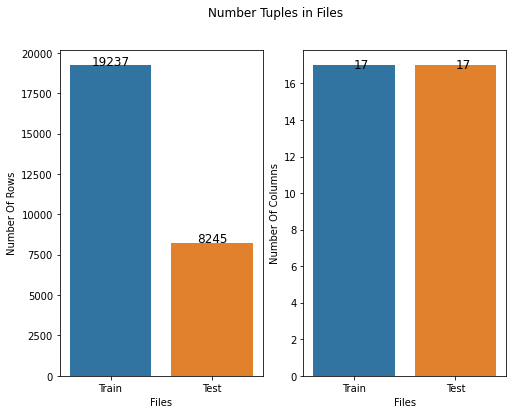

In [97]:
utils.plot_num_records({'Train': train, "Test":test})

In [98]:
for col in train.columns:
    print(col, train[col].nunique())

Levy 559
Manufacturer 65
Model 1590
Prod. year 54
Category 11
Leather interior 2
Fuel type 7
Engine volume 107
Mileage 7687
Cylinders 13
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16
Airbags 17
Price 2315


In [105]:
for col in train.columns:
    print("Col is ", col)
    print(train[col].unique())

Col is  Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1

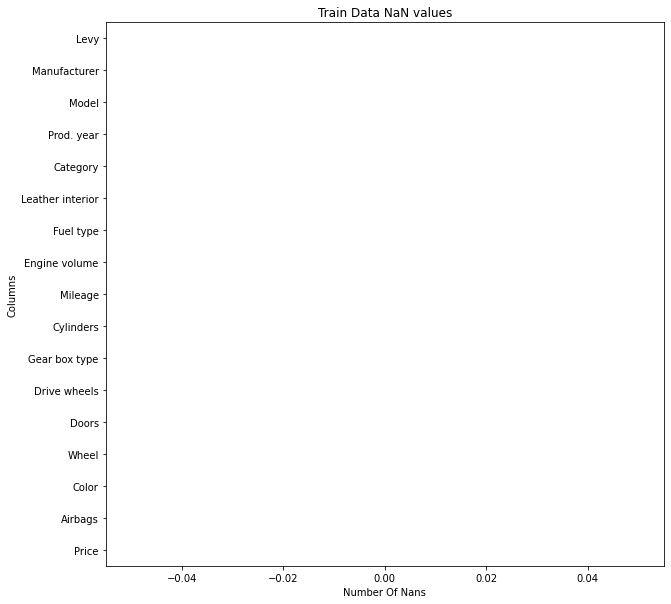

In [100]:
utils.plot_nan(train, "Train Data NaN values")

In [54]:
(train['Doors']=='04-May').sum()

18332

In [55]:
def func (x):
    if x == '04-May':
        return '04'
    if x == '02-Mar':
        return '02'
    return x

In [56]:
train['Doors'] = train['Doors'].apply(func)

In [81]:
train['Levy'].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

In [57]:
train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04,Left wheel,Black,8,16621
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04,Left wheel,Silver,4,11726


In [58]:
(train['Doors']=='04').sum()

18332

In [59]:
## Let's get some dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              19237 non-null  object
 1   Manufacturer      19237 non-null  object
 2   Model             19237 non-null  object
 3   Prod. year        19237 non-null  int64 
 4   Category          19237 non-null  object
 5   Leather interior  19237 non-null  object
 6   Fuel type         19237 non-null  object
 7   Engine volume     19237 non-null  object
 8   Mileage           19237 non-null  object
 9   Cylinders         19237 non-null  int64 
 10  Gear box type     19237 non-null  object
 11  Drive wheels      19237 non-null  object
 12  Doors             19237 non-null  object
 13  Wheel             19237 non-null  object
 14  Color             19237 non-null  object
 15  Airbags           19237 non-null  int64 
 16  Price             19237 non-null  int64 
dtypes: int64(4),

In [80]:
### Make the object as float types
import pandas as pd
train['Levy'] = train['Levy'].apply(lambda x : '0' if x == '-' else x)
train['Levy'] = train['Levy'].astype('int32', copy=False, errors='ignore')
train['Prod. year'] = train[]

ValueError: could not convert string to float: '2.0 Turbo'

In [78]:
train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010-01-01,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011-01-01,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04,Left wheel,Black,8,16621
2,0,HONDA,FIT,2006-01-01,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011-01-01,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04,Left wheel,White,0,3607
4,446,HONDA,FIT,2014-01-01,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04,Left wheel,Silver,4,11726


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Levy              19237 non-null  object        
 1   Manufacturer      19237 non-null  object        
 2   Model             19237 non-null  object        
 3   Prod. year        19237 non-null  datetime64[ns]
 4   Category          19237 non-null  object        
 5   Leather interior  19237 non-null  object        
 6   Fuel type         19237 non-null  object        
 7   Engine volume     19237 non-null  object        
 8   Mileage           19237 non-null  object        
 9   Cylinders         19237 non-null  int64         
 10  Gear box type     19237 non-null  object        
 11  Drive wheels      19237 non-null  object        
 12  Doors             19237 non-null  object        
 13  Wheel             19237 non-null  object        
 14  Color             1923